# Tensorflow Use prebuilt dataset

In [1]:
# Import standard libraries that you may use most times
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

print("TensorFlow version:", tf.__version__)

2023-03-21 15:09:07.644068: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.11.0


In [2]:
# 2. Load the data set

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to 0 through 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# This is another way to load the data
# Construct a tf.data.Dataset

(ds, ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], shuffle_files=True, with_info=True)
print(" Len: ", len(ds), len(ds_test) )
# Build your input pipeline
ds = ds.shuffle(60000).batch(1).prefetch(tf.data.AUTOTUNE)
for example in ds.take(1):
  image, label = example["image"], example["label"]
  print(image.shape, label)

##
#Uncomment the following line to get information on the dataset you loaded.
# ds_info

2023-03-21 15:11:40.627080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 Len:  60000 10000
(1, 28, 28, 1) tf.Tensor([4], shape=(1,), dtype=int64)


# Explore the data

In [4]:
"Shape of the data", x_train.shape, y_train.shape, x_test.shape, y_test.shape

('Shape of the data', (60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

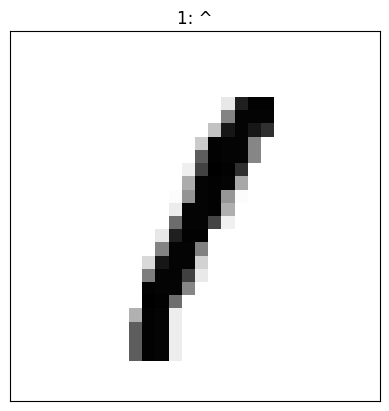

In [6]:
def plot( x=x_train, y= y_train, image_index=888, yh=""):
    plt.imshow(x[image_index], cmap='Greys');
    plt.title (f"{y[image_index]}: ^{yh}" );
    plt.tick_params(left= False, labelleft = False , labelbottom = False, bottom = False)

plot(x_train, y_train, 77)

In [7]:
# 3. Create a model

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

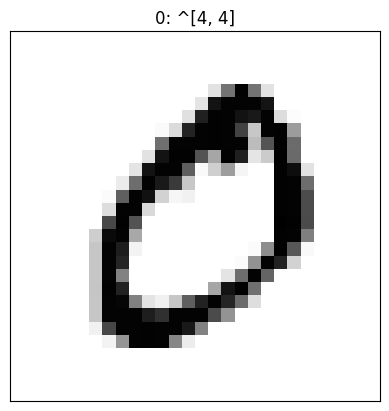

In [8]:
predictions = model(x_train[:1]).numpy()

p1 = np.argmax(predictions)
p2 = np.argmax(tf.nn.softmax(predictions).numpy())

plot(x_train, y_train, 1, [p1,p2])


In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.evaluate(x_test,  y_test, verbose=2)


# Another way to pass optimizers by creating object as follows:
# This will giveopportunities to pass parameters to optimizers
#
# opt = tf.keras.optimizers.Adam(1e-5)
# model.compile(optimizer=opt, 



313/313 - 1s - loss: 2.4045 - accuracy: 0.1290 - 570ms/epoch - 2ms/step


[2.404527425765991, 0.1289999932050705]

## Train and evaluate your model


In [10]:
hist = model.fit(x_train, y_train, epochs=5, verbose= False);

{'loss': [0.29738855361938477, 0.1408606320619583, 0.10605698078870773, 0.08529774844646454, 0.07357270270586014], 'accuracy': [0.9143999814987183, 0.9581833481788635, 0.9674833416938782, 0.973800003528595, 0.9763666391372681]}


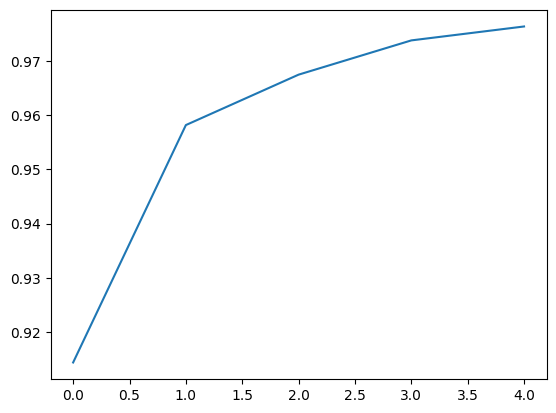

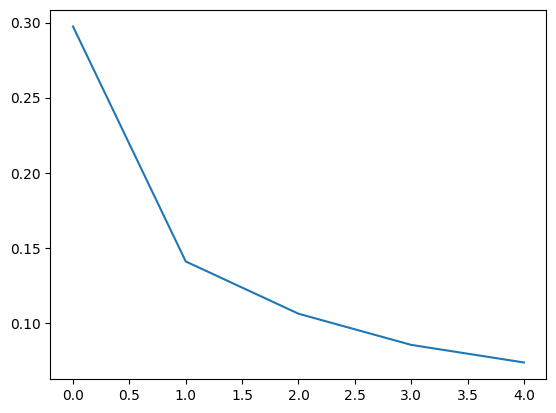

In [11]:
print(hist.history)
plt.plot(hist.history['accuracy'])
plt.show()
plt.plot(hist.history['loss'])

In [12]:
model.evaluate(x_train,  y_train, verbose=2)

1875/1875 - 2s - loss: 0.0384 - accuracy: 0.9885 - 2s/epoch - 1ms/step


[0.0383661687374115, 0.9884833097457886]

In [11]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0736 - accuracy: 0.9777 - 264ms/epoch - 843us/step


[0.07363472133874893, 0.9776999950408936]

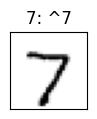

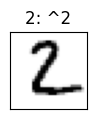

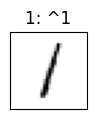

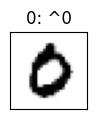

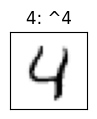

In [13]:
p = [np.argmax(k) for k in model(x_test[:5])]
for i, l in enumerate(p):
    plt.figure(figsize=(1,1))
    plot(x_test, y_test, i, l);
    plt.show()


## Conclusion

Congratulations! on predicting minst data. You have successfully built a neural network to classify handwritten digits with Tensorflow’s Keras API. You have achieved accuracy of 97%.